In [ ]:
!pip install tensorflow_datasets

In [96]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import random


In [2]:
dataset = tfds.load('amazon_us_reviews/Watches_v1_00', split='train', shuffle_files=True)

2023-03-18 00:14:03.855982: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/sunilthapa/tensorflow_datasets/amazon_us_reviews/Watches_v1_00/0.1.0.incomplete5A2LWM/amazon_…

Dataset amazon_us_reviews downloaded and prepared to /Users/sunilthapa/tensorflow_datasets/amazon_us_reviews/Watches_v1_00/0.1.0. Subsequent calls will reuse this data.


In [3]:
df = tfds.as_dataframe(dataset)

2023-03-18 00:28:40.836504: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [7]:
df.to_csv('Watches_v1_00.csv')

In [88]:
df = pd.read_csv('Watches_v1_00.csv')

In [36]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'helpful_votes', 'marketplace',
       'product_category', 'product_id', 'product_parent', 'product_title',
       'review_body', 'review_date', 'review_headline', 'review_id',
       'star_rating', 'total_votes', 'verified_purchase', 'vine'],
      dtype='object')

In [37]:
df.drop(columns='Unnamed: 0', inplace=True)

In [38]:
df.drop(columns=['review_id','product_id','vine','product_parent','review_headline'],inplace=True)

In [51]:
df.head()

,customer_id,helpful_votes,marketplace,product_category,product_title,review_body,review_date,star_rating,total_votes,verified_purchase,review_length
0,b'40915676',0,b'US',b'Watches',"b""U.S. Polo Assn. Sport Men's US9057 Black Met...","b""It's exactly how it looks like, the colors a...",b'2013-12-24',5,0,0,110
1,b'42279473',0,b'US',b'Watches',b'Burberry Mens BU7818 Utilitarian Black Leath...,b'Very happy!',b'2014-08-01',5,1,0,14
2,b'44311301',2,b'US',b'Watches',"b""Invicta Men's 5249S Pro Diver Stainless Stee...",b'Bought this watch for my husband as a weddin...,b'2013-06-13',1,2,0,183
3,b'42616791',0,b'US',b'Watches',"b""XOXO Women's XO3041 Black Dial Black Strap W...",b'A great Watch for my Nurse wife. This is Ok ...,b'2012-06-11',5,0,0,137
4,b'37080317',1,b'US',b'Watches',"b""Sector Men's R3253161003 Marine Stainless St...","b""I've had a sector diver watch before ,it la...",b'2014-07-20',5,1,0,107


In [68]:
df.dtypes

customer_id          object
helpful_votes         int64
marketplace          object
product_category     object
product_title        object
review_body          object
review_date          object
star_rating           int64
total_votes           int64
verified_purchase     int64
review_length         int64
dtype: object

In [67]:
df['product_title'][0][1:][1:-1]

"U.S. Polo Assn. Sport Men's US9057 Black Metal Watch with Orange Rubber Band"

In [69]:
for d in df:
    if df[d].dtype != 'int64':
        df[d] = df[d].apply(lambda x: x[1:][1:-1])

In [70]:
df.head()

,customer_id,helpful_votes,marketplace,product_category,product_title,review_body,review_date,star_rating,total_votes,verified_purchase,review_length
0,40915676,0,US,Watches,U.S. Polo Assn. Sport Men's US9057 Black Metal...,"It's exactly how it looks like, the colors are...",2013-12-24,5,0,0,110
1,42279473,0,US,Watches,Burberry Mens BU7818 Utilitarian Black Leather...,Very happy!,2014-08-01,5,1,0,14
2,44311301,2,US,Watches,Invicta Men's 5249S Pro Diver Stainless Steel ...,Bought this watch for my husband as a wedding ...,2013-06-13,1,2,0,183
3,42616791,0,US,Watches,XOXO Women's XO3041 Black Dial Black Strap Watch,A great Watch for my Nurse wife. This is Ok bu...,2012-06-11,5,0,0,137
4,37080317,1,US,Watches,Sector Men's R3253161003 Marine Stainless Stee...,"I've had a sector diver watch before ,it last...",2014-07-20,5,1,0,107


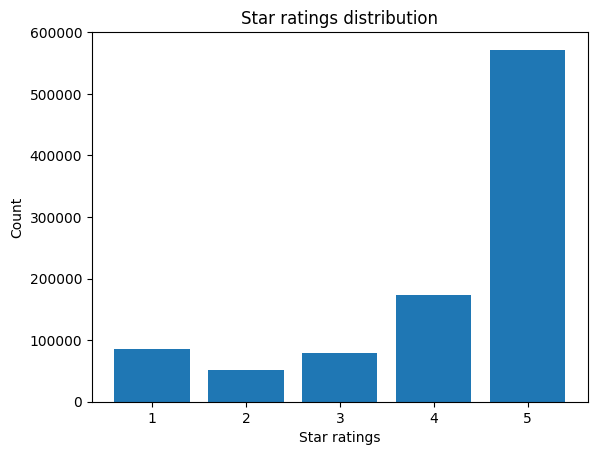

In [44]:
star_ratings_count = df['star_rating'].value_counts().sort_index()

# Plot a bar chart
plt.bar(star_ratings_count.index, star_ratings_count.values)

# Add labels and title
plt.xlabel('Star ratings')
plt.ylabel('Count')
plt.title('Star ratings distribution')

# Show the chart
plt.show()

In [40]:
df['verified_purchase'].value_counts()

0    831415
1    129457
Name: verified_purchase, dtype: int64

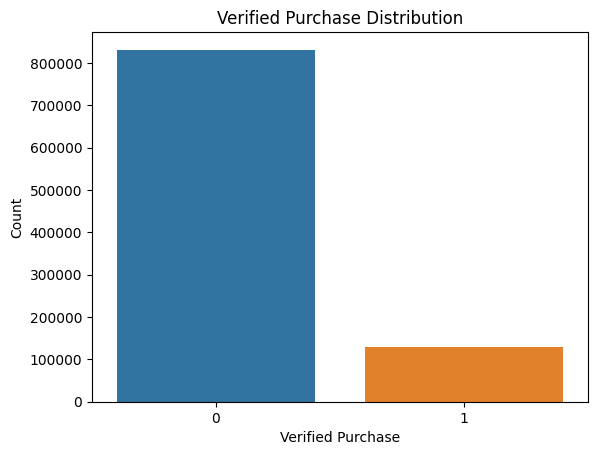

In [45]:
# Create a countplot using Seaborn
sns.countplot(x='verified_purchase', data=df)

# Add labels and title
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.title('Verified Purchase Distribution')

# Show the chart
plt.show()

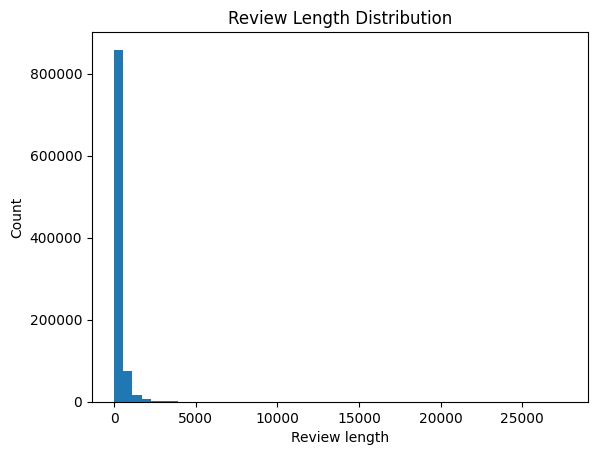

In [46]:
# Calculate the length of each review
df['review_length'] = df['review_body'].apply(len)

# Create a histogram of review lengths
plt.hist(df['review_length'], bins=50)

# Add labels and title
plt.xlabel('Review length')
plt.ylabel('Count')
plt.title('Review Length Distribution')

# Show the chart
plt.show()

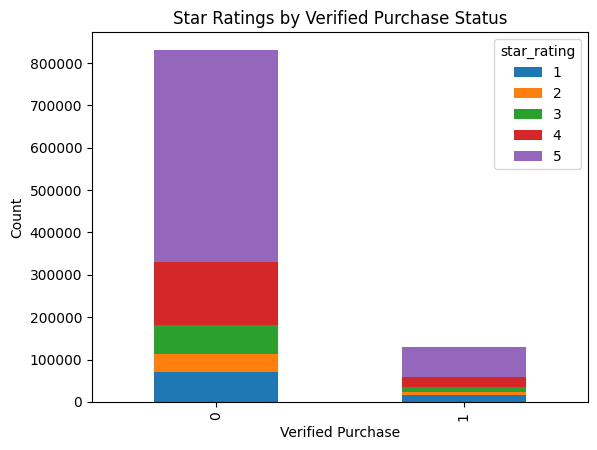

In [47]:
# Group the data by verified purchase and star rating
grouped = df.groupby(['verified_purchase', 'star_rating']).size().unstack()

# Create a stacked bar chart of star ratings by verified purchase
grouped.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.title('Star Ratings by Verified Purchase Status')

# Show the chart
plt.show()

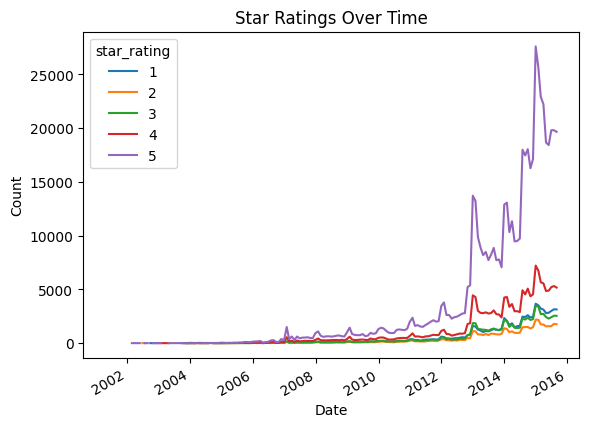

In [71]:
# Convert the review_date column to a datetime object
df['review_date'] = pd.to_datetime(df['review_date'], format='%Y-%m-%d')

# Group the data by review date and star rating
grouped = df.groupby([pd.Grouper(key='review_date', freq='M'), 'star_rating']).size().unstack()

# Create a line chart of star ratings over time
grouped.plot()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Star Ratings Over Time')

# Show the chart
plt.show()

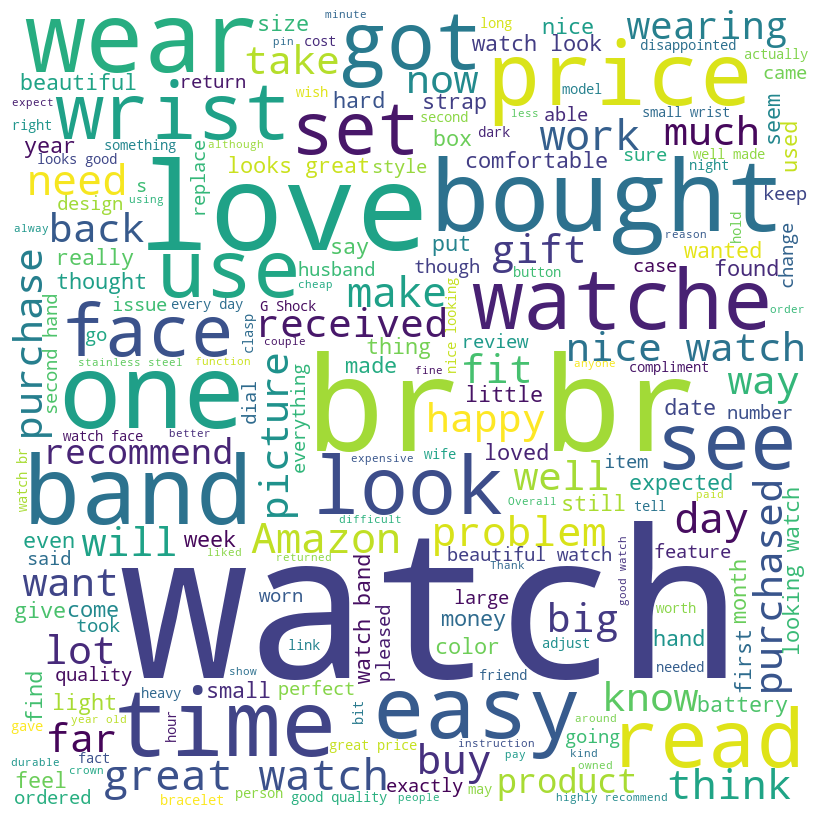

In [74]:
# Combine all review bodies into a single string
all_reviews = ' '.join(df['review_body'].tolist())

# Create a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

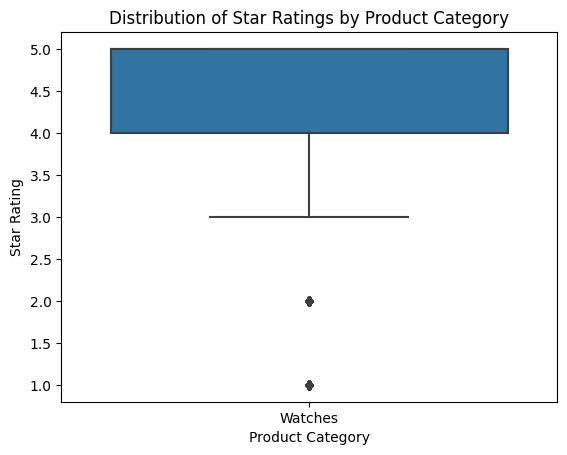

In [75]:
# Create a box plot of star ratings by product category
sns.boxplot(x='product_category', y='star_rating', data=df)

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Star Rating')
plt.title('Distribution of Star Ratings by Product Category')

# Show the chart
plt.show()

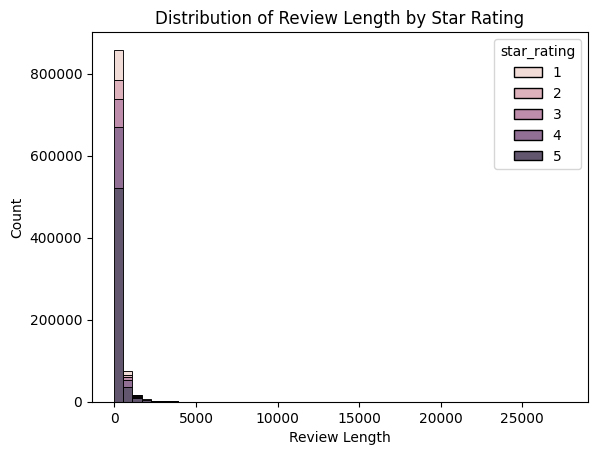

In [76]:
# Create a new column with the length of each review body
df['review_length'] = df['review_body'].apply(len)

# Create a histogram of review length by star rating
sns.histplot(x='review_length', hue='star_rating', data=df, multiple='stack', bins=50)

# Add labels and title
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Length by Star Rating')

# Show the chart
plt.show()

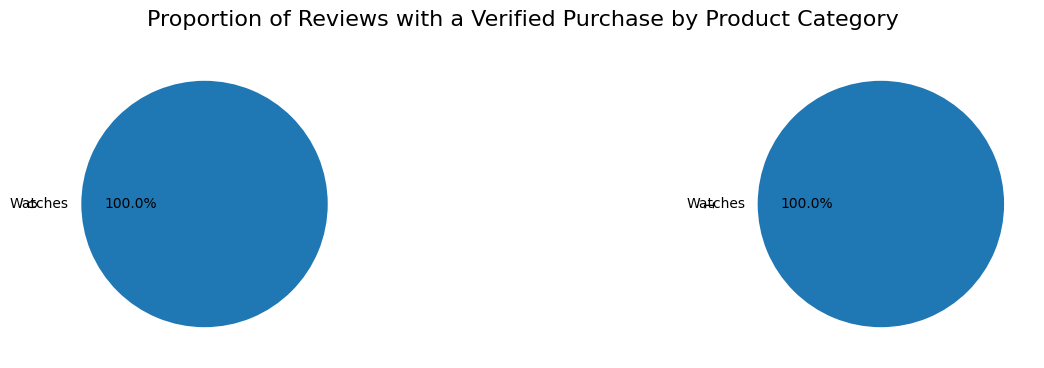

In [77]:
# Group the dataframe by product category and calculate the proportion of reviews with a verified purchase
grouped_df = df.groupby('product_category')['verified_purchase'].value_counts(normalize=True).unstack().fillna(0)

# Create a pie chart of the proportion of reviews with a verified purchase by product category
grouped_df.plot(kind='pie', subplots=True, figsize=(16, 4), autopct='%1.1f%%', legend=False)

# Add title
plt.suptitle('Proportion of Reviews with a Verified Purchase by Product Category', fontsize=16)

# Show the chart
plt.show()

In [105]:
df["Sentiment"] = df["star_rating"].apply(lambda score: "positive" if score >= 3 else "negative")
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})
# df['short_review'] =df['review_body'].str.decode("utf-8")
df['short_review'] =df['review_body']

In [106]:
neg_df = df[df['Sentiment'] == 0].head(20000)
pos_df = df[df['Sentiment'] == 1].head(20000)
dfs = [neg_df, pos_df]
random.shuffle(dfs)
new_df = pd.concat(dfs)

In [107]:
new_df.shape

(40000, 18)

In [108]:
new_df['Sentiment'].value_counts()

1    20000
0    20000
Name: Sentiment, dtype: int64

In [109]:
new_df.isnull().sum()

Unnamed: 0           0
customer_id          0
helpful_votes        0
marketplace          0
product_category     0
product_id           0
product_parent       0
product_title        0
review_body          0
review_date          0
review_headline      0
review_id            0
star_rating          0
total_votes          0
verified_purchase    0
vine                 0
Sentiment            0
short_review         0
dtype: int64

In [110]:
new_df.to_csv('dataset_40k.csv')

In [83]:
df = df[['Sentiment', 'short_review']]

In [84]:
df.head()

,Sentiment,short_review
0,1,NaN
1,1,NaN
2,0,NaN
3,1,NaN
4,1,NaN


In [87]:
df['Sentiment'].value_counts()

1    42758
0     7242
Name: Sentiment, dtype: int64

In [85]:
df.shape

(50000, 2)

In [12]:
df.sample

<bound method NDFrame.sample of         Sentiment                                       short_review
0               1  It's exactly how it looks like, the colors are...
1               1                                        Very happy!
2               0  Bought this watch for my husband as a wedding ...
3               1  A great Watch for my Nurse wife. This is Ok bu...
4               1  I've  had a sector diver watch before ,it last...
...           ...                                                ...
960867          1  i like this watch. its simple, elegant with da...
960868          1  Pro: Surprisingly fast shipping. It arrived an...
960869          0  I wanted an alarm wristwatch I could set for a...
960870          0     I have received watch in non working condition
960871          1                                      buen producto

[960872 rows x 2 columns]>